In [560]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split

# Remove outliar function

In [388]:
#Remove outliars(dataframe , role with outliars)
def RemoveOutLiars(data , rolename):
    Q1 = data[rolename].quantile(0.25) #Q1
    Q3 = data[rolename].quantile(0.75) #Q3
    IQR = Q3 - Q1 #IQR = Q3 - Q1
    count = 0

    tempList = [] #empty list to sort index

    #loop through list to find outliars
    for entry in data[rolename].values.tolist():
        if((entry < (Q1 - 1.5 * IQR)) or  (entry > (Q3 + 1.5 * IQR))):
            #append index
            tempList.append(count)
        count += 1
    
    #return removed list
    return data.drop(tempList)

# Cramer'V to calculate correleation for categorical data

In [389]:
def carmer(data):

    data = priceOwner_df.to_numpy()

    #Chi-squared test statistic, sample size, and minimum of rows and columns
    X2 = stats.chi2_contingency(data, correction=False)[0]
    n = np.sum(data)
    minDim = min(data.shape)-1

    #calculate Cramer's V 
    V = np.sqrt((X2/n) / minDim)

    #display Cramer's V
    print(V)


# Import Data

In [539]:
file = pd.read_csv('GameData_backup_with_review.csv' ,low_memory=0, header=0 , keep_default_na=False , encoding='ANSI')

# Category breakdown

In [540]:
file = file[['price',
 'positive',
 'negative',
 'owners',
 '18+',
 'Casual',
 'Indie',
 'Free to Play',
 'RPG',
 'Strategy',
 'Sports',
 'Simulation',
 'Racing',
 'Massively Multiplayer',
 'Act_Adv',
 'owner_cat',
 'total_lang',
 'review']
]



In [397]:
file

,price,positive,owners,18+,Casual,Indie,Free to Play,RPG,Strategy,Sports,Simulation,Racing,Massively Multiplayer,Act_Adv,owner_cat,total_lang
0,9.9,15980,10000000,0,0,0,0,0,0,0,0,0,0,1,7,1
1,9.9,38298,5000000,0,0,0,0,0,0,0,0,0,0,1,8,16
2,9.9,583694,50000000,0,0,0,0,0,0,0,0,0,0,1,9,26
3,0.0,1415893,200000000,0,0,0,1,0,1,0,0,0,0,1,12,26
4,0.0,18973,5000000,0,0,0,0,0,0,0,0,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41303,9.9,7,20000,0,1,0,0,0,0,0,0,0,0,1,0,1
41304,9.9,7,50000,0,1,0,0,0,0,0,0,0,0,1,2,1
41305,9.9,1,20000,0,1,0,0,0,0,0,0,0,0,1,0,1
41306,9.9,3,20000,0,1,0,0,0,0,0,0,0,0,1,0,1


# Breakdown 

In [379]:
file_type_breakdown = file.groupby("owners").size().reset_index(name = "counts").sort_values("counts", ascending = False)

In [380]:
file_type_breakdown

,owners,counts
0,20000,28246
1,50000,5315
2,100000,2641
3,200000,1860
4,500000,1727
5,1000000,743
6,2000000,409
7,5000000,267
8,10000000,66
9,20000000,23


In [ ]:
file_type_breakdown = file.groupby("owners").size().reset_index(name = "counts").sort_values("counts", ascending = False)

# Display all column names

In [262]:
list(file.columns.values)

['price',
 'positive',
 'owners',
 '18+',
 'Casual',
 'Indie',
 'Free To Play',
 'RPG',
 'Strategy',
 'Sports',
 'Simulation',
 'Racing',
 'Massivley Multiplayer',
 'Act_Adv',
 'owner_cat',
 'total_lang']

41308


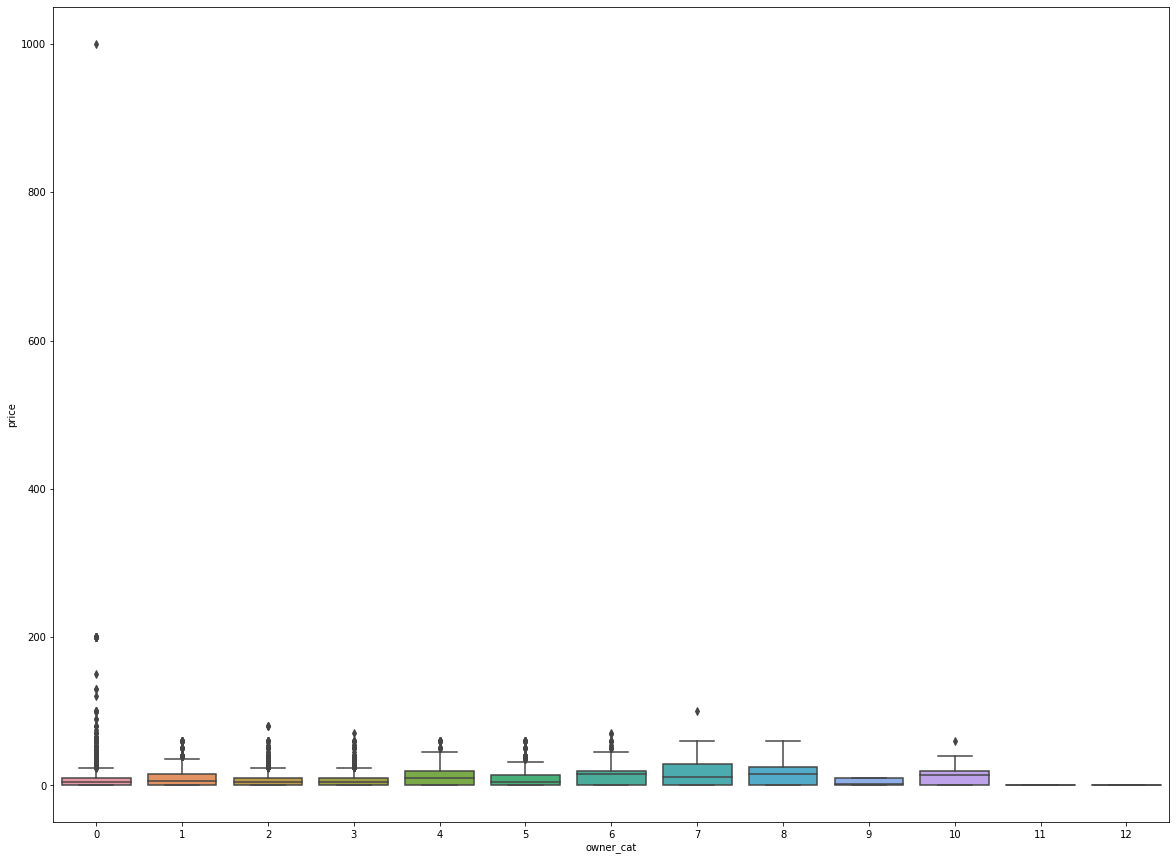

In [263]:
priceOwner_df = pd.DataFrame(file[['price' , 'owner_cat']])

f = plt.figure(figsize=(20,15))
sb.boxplot(y = 'price' , x = 'owner_cat' , data= priceOwner_df)

print(len(priceOwner_df))

# Removing outlier (199.999 price game)

In [315]:
owner_cleaned = file[ file.price < 100]

priceOwner_df = pd.DataFrame(owner_cleaned[['price' , 'owner_cat']])

In [316]:
priceOwner_df

,price,owner_cat
0,4.90,0
1,0.00,0
2,9.90,0
3,0.00,0
4,9.90,0
...,...,...
41303,0.00,10
41304,14.99,10
41305,0.00,11
41306,0.00,11


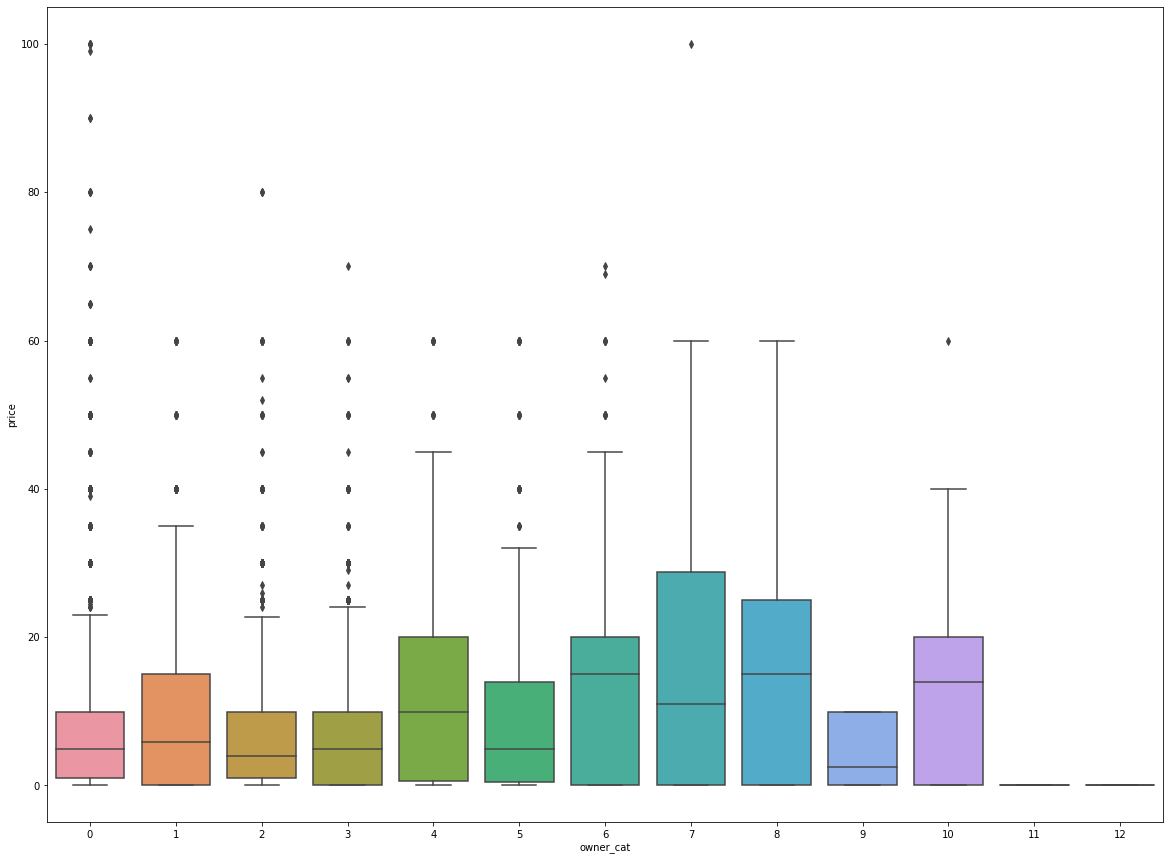

In [317]:
pf = plt.figure(figsize=(20,15))
sb.boxplot(y = 'price' , x = 'owner_cat' , data= priceOwner_df )

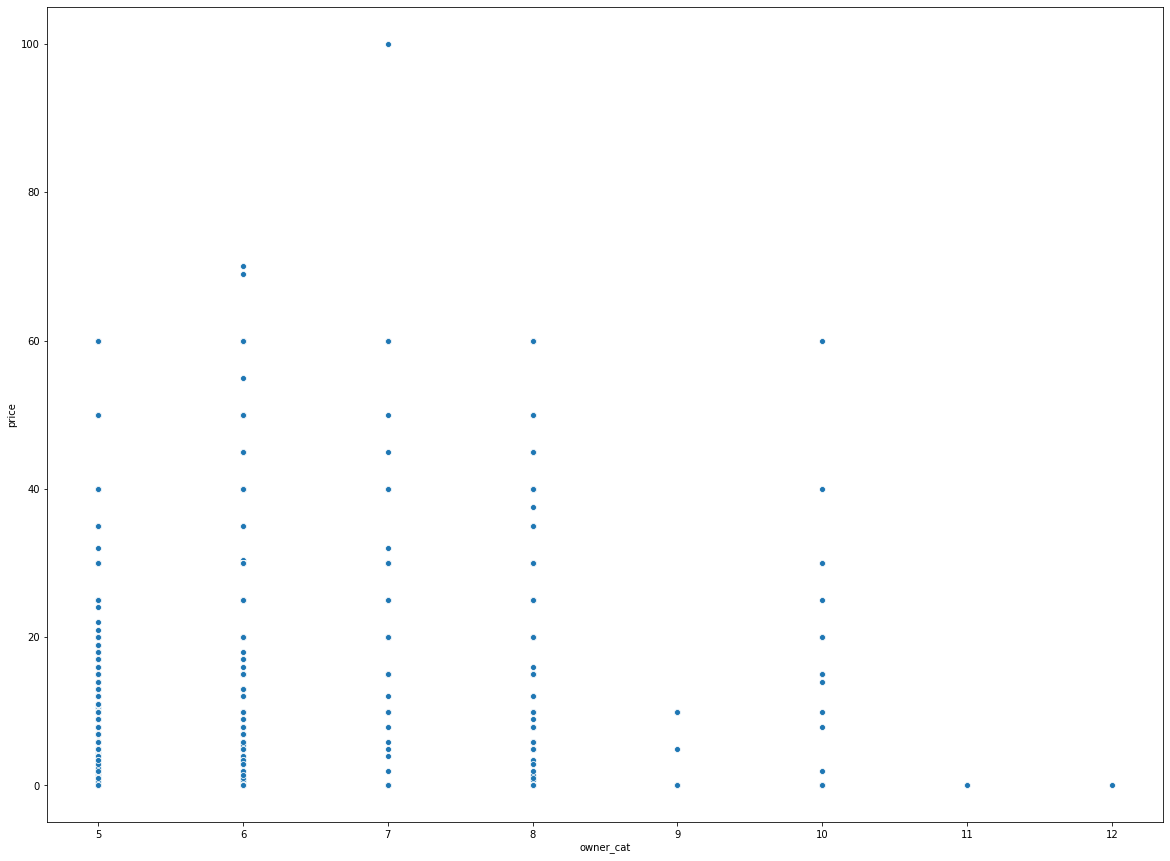

In [318]:
games_1m = file[ file.owner_cat > 4]

pf = plt.figure(figsize=(20,15))
sb.scatterplot(y = 'price' , x = 'owner_cat' , data= temp )

In [320]:
games_1m = games_1m.sort_values(by=['price'])

totalFreeGames = len(games_1m[games_1m.price == 0])
print("Free game(Owned by more than 1m people): "+ str(totalFreeGames))
print("Priced games(Owned by more than 1m people): "+ str(len(temp) - totalFreeGames))

Free game(Owned by more than 1m people): 669
Priced games(Owned by more than 1m people): 1967


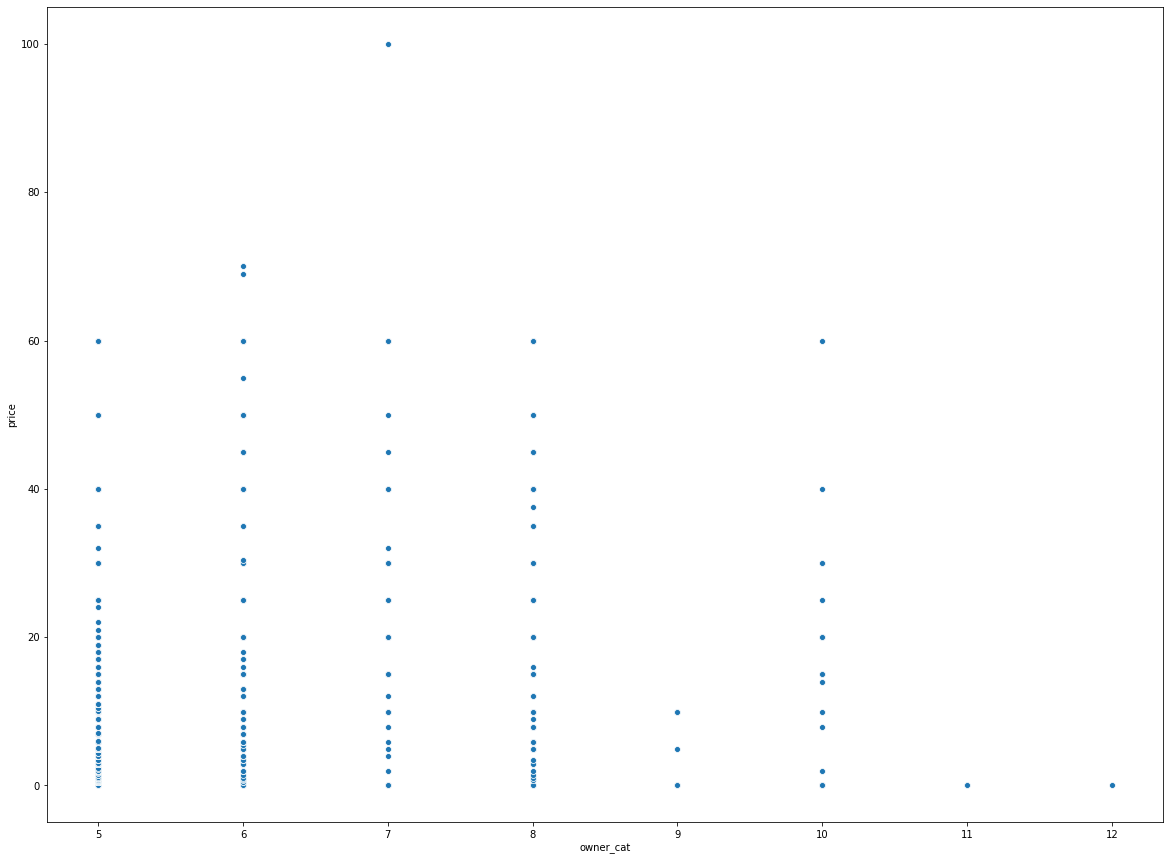

In [321]:
pf = plt.figure(figsize=(20,15))
sb.scatterplot(y = 'price' , x = 'owner_cat' , data= games_1m )

# Analysis on genre

In [398]:
genre_df = pd.DataFrame(file[['price',
 '18+',
 'Casual',
 'Indie',
 'Free to Play',
 'RPG',
 'Strategy',
 'Sports',
 'Simulation',
 'Racing',
 'Massively Multiplayer',
 'Act_Adv',
 'owner_cat',
 'total_lang']])

Indie: 73.82%
Act_Adv: 63.83%
Casual: 40.56%
Simulation: 19.51%
Strategy: 19.32%
RPG: 17.08%
Free to Play: 7.75%
Sports: 5.07%
Racing: 3.67%
Massively Multiplayer: 2.83%
18+: 0.24%


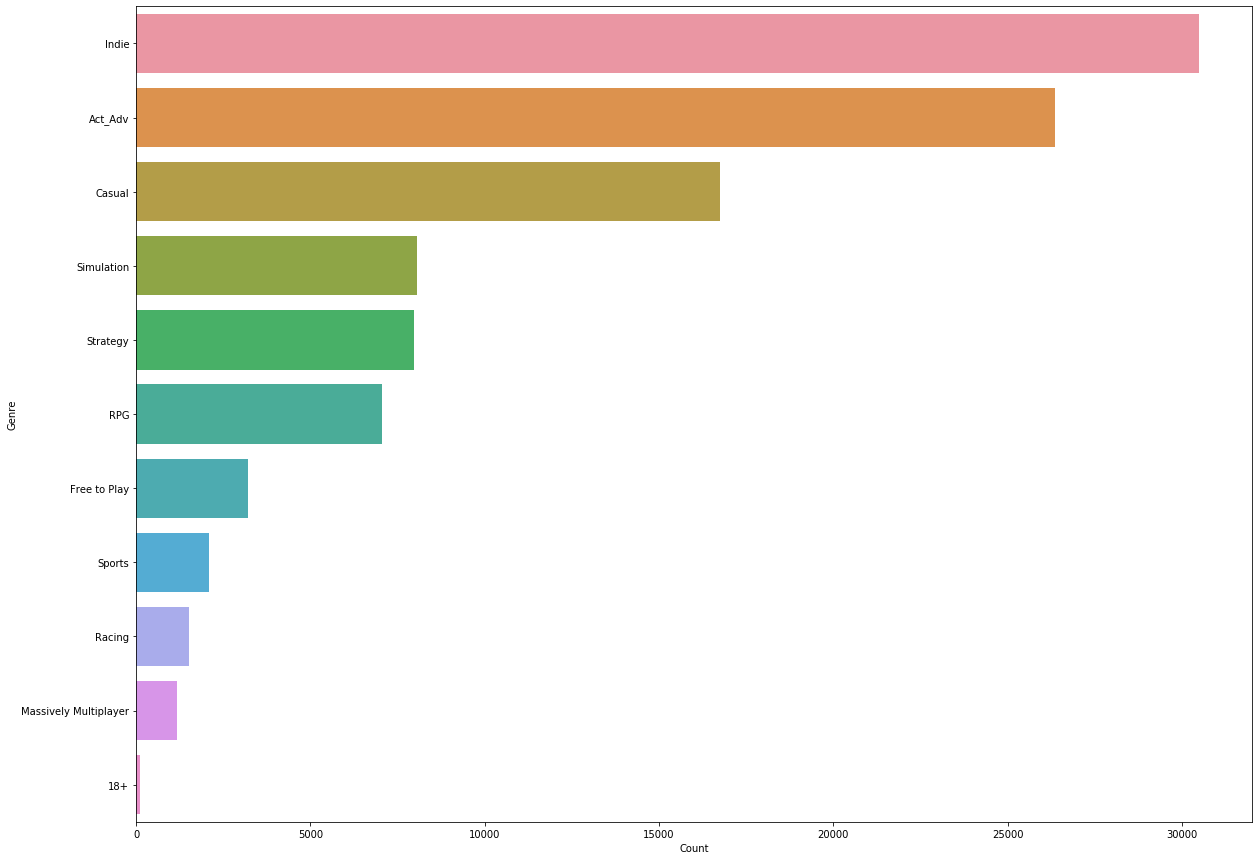

In [592]:
tempList =  ['18+','Casual', 'Indie','Free to Play','RPG','Strategy','Sports','Simulation','Racing','Massively Multiplayer',
 'Act_Adv']

genre_list = []

for genre in tempList:
    temp = genre_df[genre].value_counts()
    genre_list.append([genre , temp[1]])

genre_count = pd.DataFrame(genre_list )
genre_count.columns =["Genre", "Count"]
genre_count = genre_count.sort_values(by=[ "Count"] , ascending=False)

genre_list.sort(key=lambda lst:lst[1] ,reverse=True)

for genre in genre_list:
    print(genre[0] +": "  + str(round(100 / len(genre_df) * genre[1] , 2)) + "%"  )

pf = plt.figure(figsize=(20,15))
sb.barplot( y = "Genre" , x = "Count" , data= genre_count )

# Diving in to genre of games with high number of owner

Act_Adv: 73.2%
Indie: 37.63%
RPG: 25.13%
Free to Play: 22.29%
Strategy: 21.01%
Simulation: 19.2%
Massively Multiplayer: 12.5%
Casual: 12.37%
Sports: 4.64%
Racing: 2.71%
18+: 0.0%


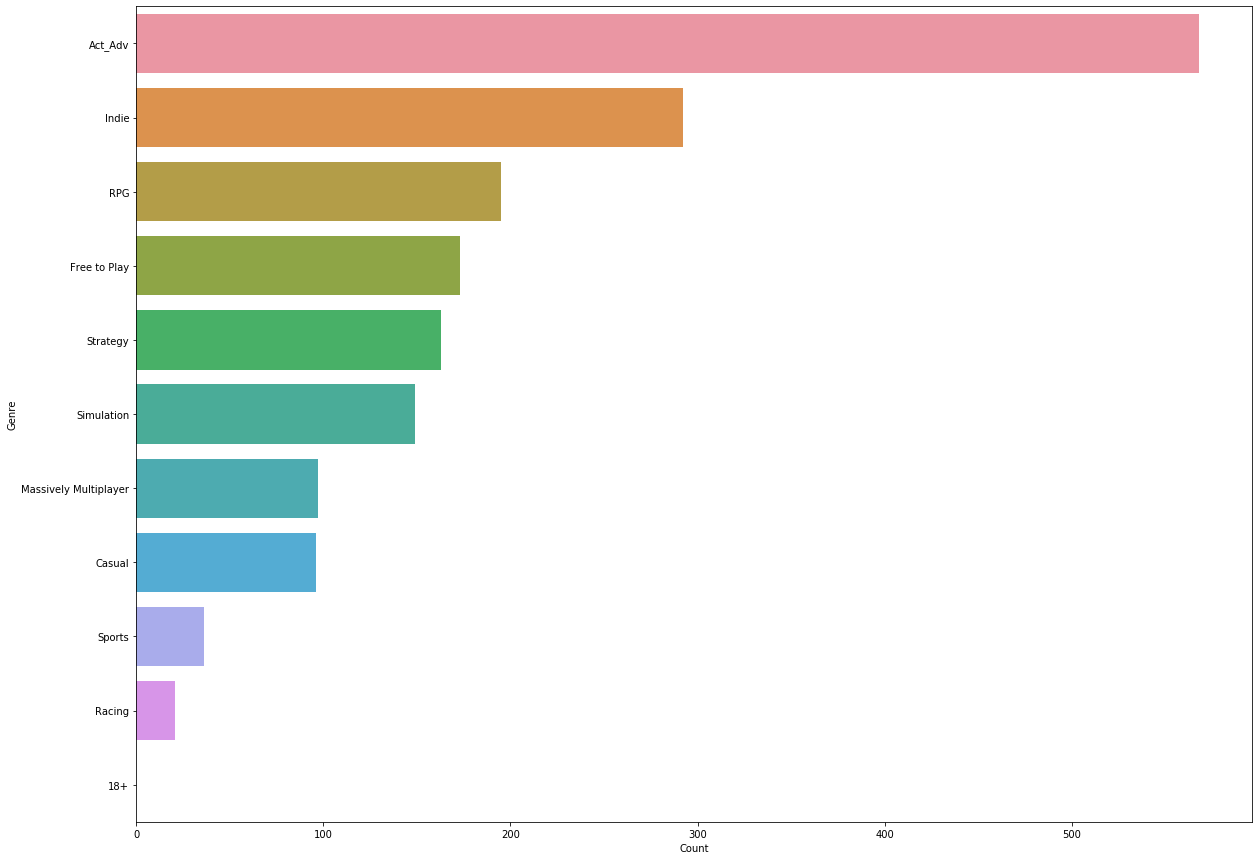

In [595]:
genre_1m_df = pd.DataFrame(file[[
 '18+',
 'Casual',
 'Indie',
 'Free to Play',
 'RPG',
 'Strategy',
 'Sports',
 'Simulation',
 'Racing',
 'Massively Multiplayer',
 'Act_Adv',
 'owner_cat']])

genre_1m_df = file[ genre_1m_df.owner_cat > 5]

genre__1m_list = []

for genre in tempList:
    temp = genre_1m_df[genre].value_counts()
    
    if(len(temp) > 1):
        genre__1m_list.append([genre , temp[1]])
    else:
        genre__1m_list.append([genre , 0])

genre_count = pd.DataFrame(genre__1m_list)
genre_count.columns =["Genre", "Count"]
genre_count = genre_count.sort_values(by=[ "Count"] , ascending=False)

pf = plt.figure(figsize=(20,15))
sb.barplot( y = "Genre" , x = "Count" , data= genre_count )

genre__1m_list.sort(key=lambda lst:lst[1] ,reverse=True)

for genre in genre__1m_list:
    print(genre[0] +": "  + str(round(100 / len(genre_1m_df ) * genre[1] , 2)) + "%"  )

# Plotting Owner Category VS Positive

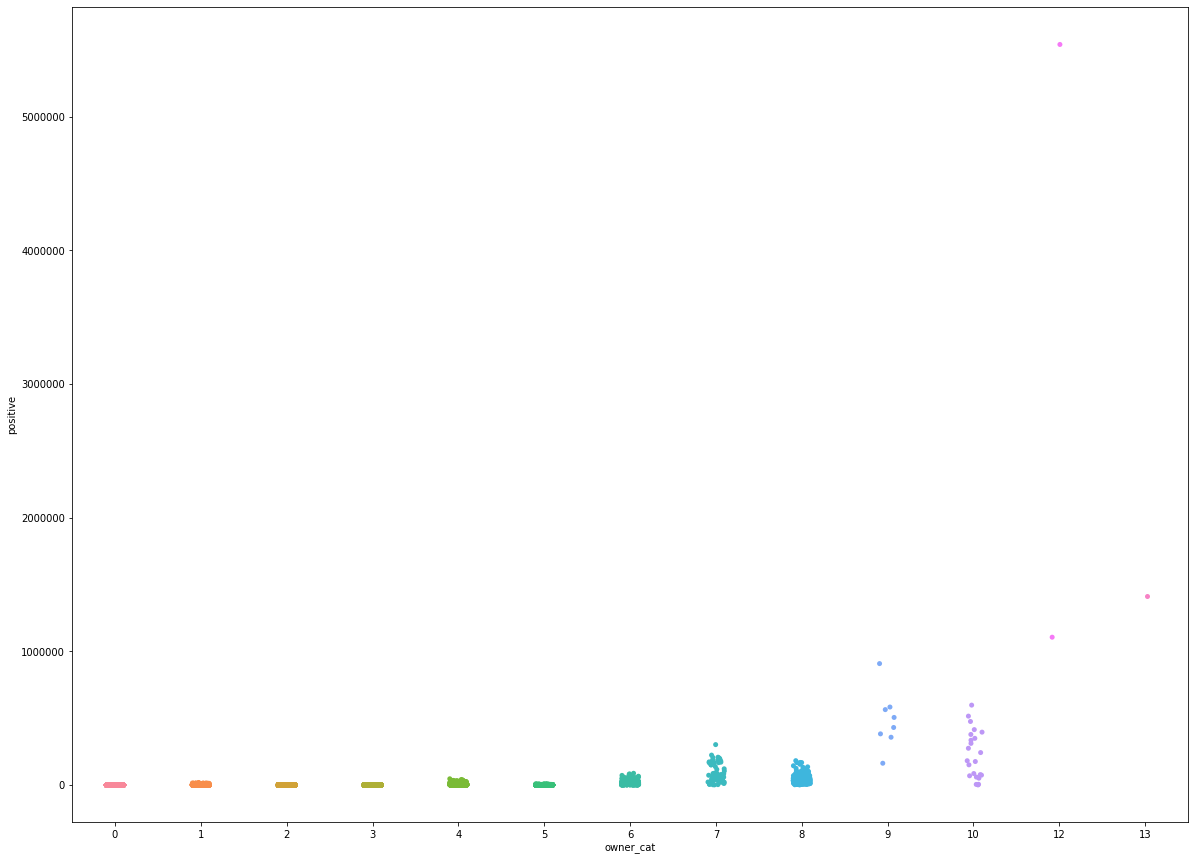

In [530]:
games_1m = pd.DataFrame(file[['positive' , 'owner_cat']])

f = plt.figure(figsize=(20,15))
sb.stripplot(y = 'positive' , x = 'owner_cat' , data= positiveOwner_df)

# Removing outlier

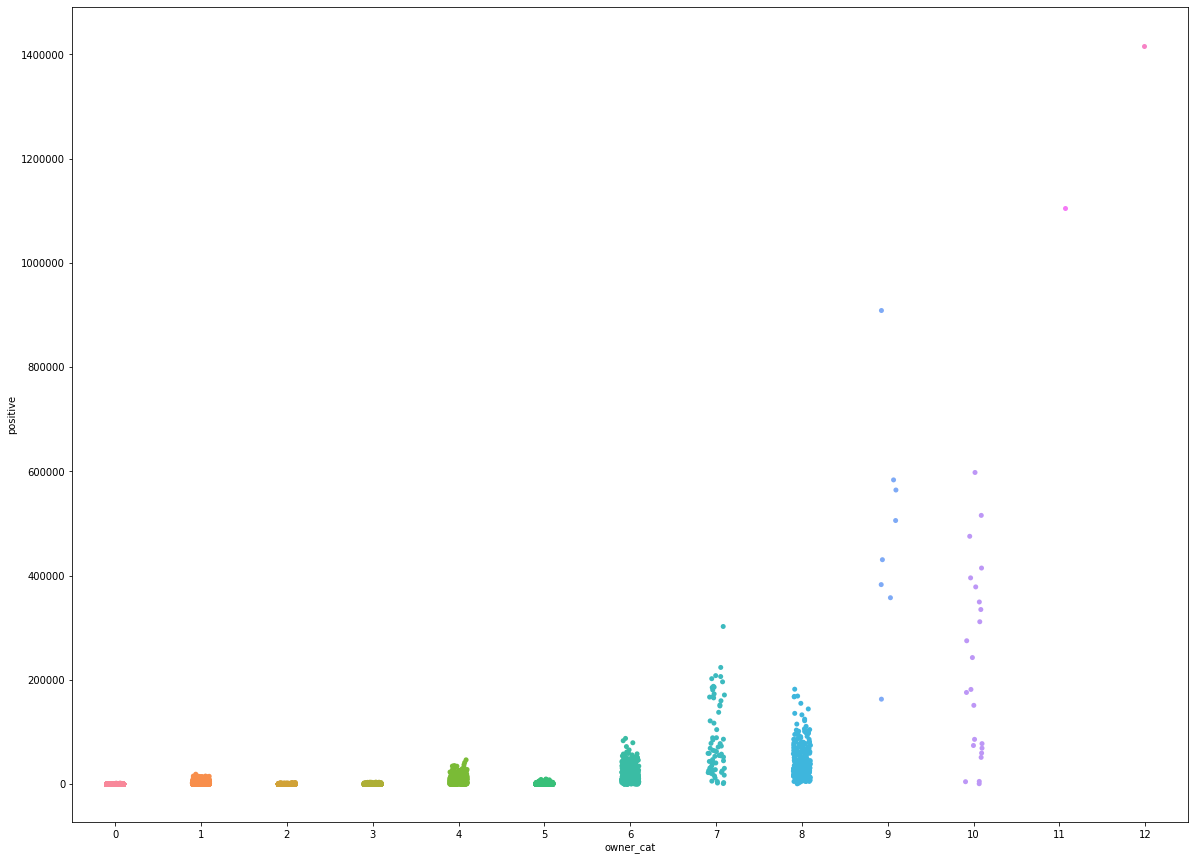

In [536]:
games_1m_remove = file[ file.positive < 3000000]

f = plt.figure(figsize=(20,15))
sb.stripplot(y = 'positive' , x = 'owner_cat' , data= games_1m_remove)

# Total Language supported VS Owner Category

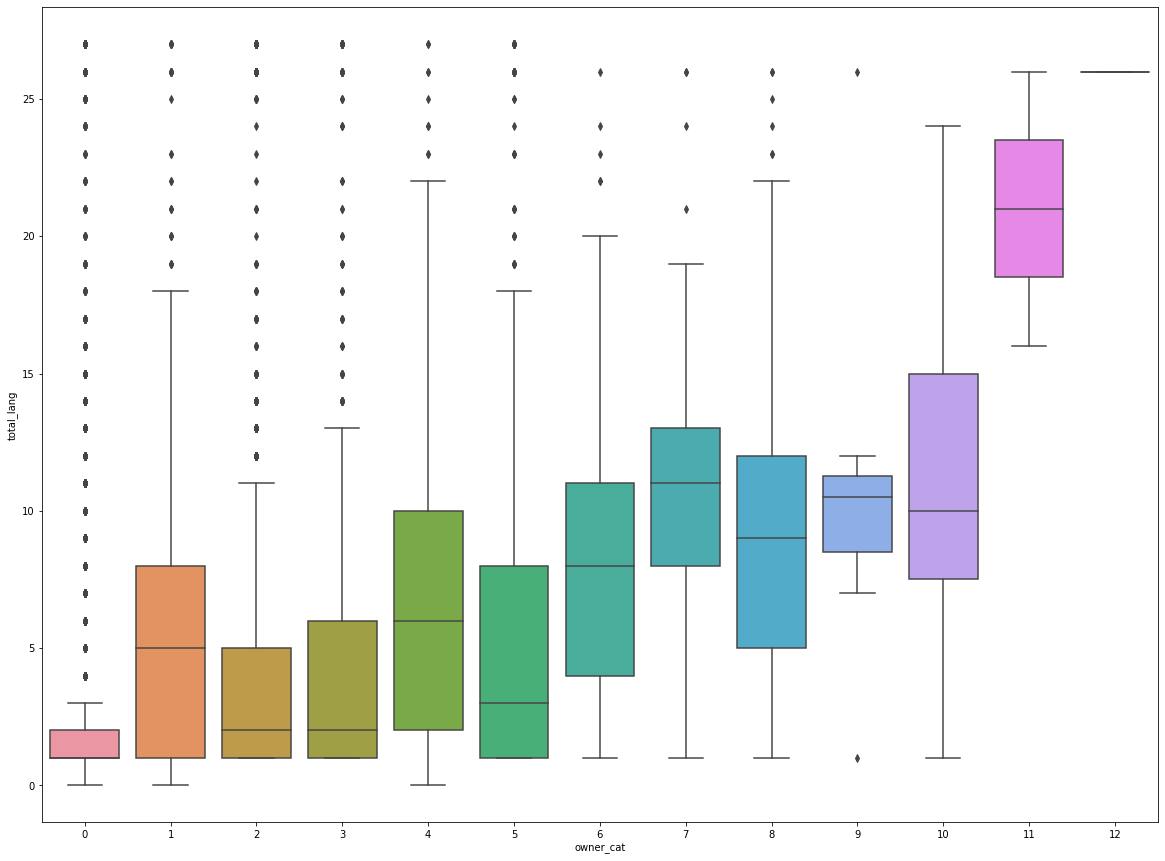

In [572]:
f = plt.figure(figsize=(20,15))
sb.boxplot(y = 'total_lang' , x = 'owner_cat' , data= file)

# Removing outliers

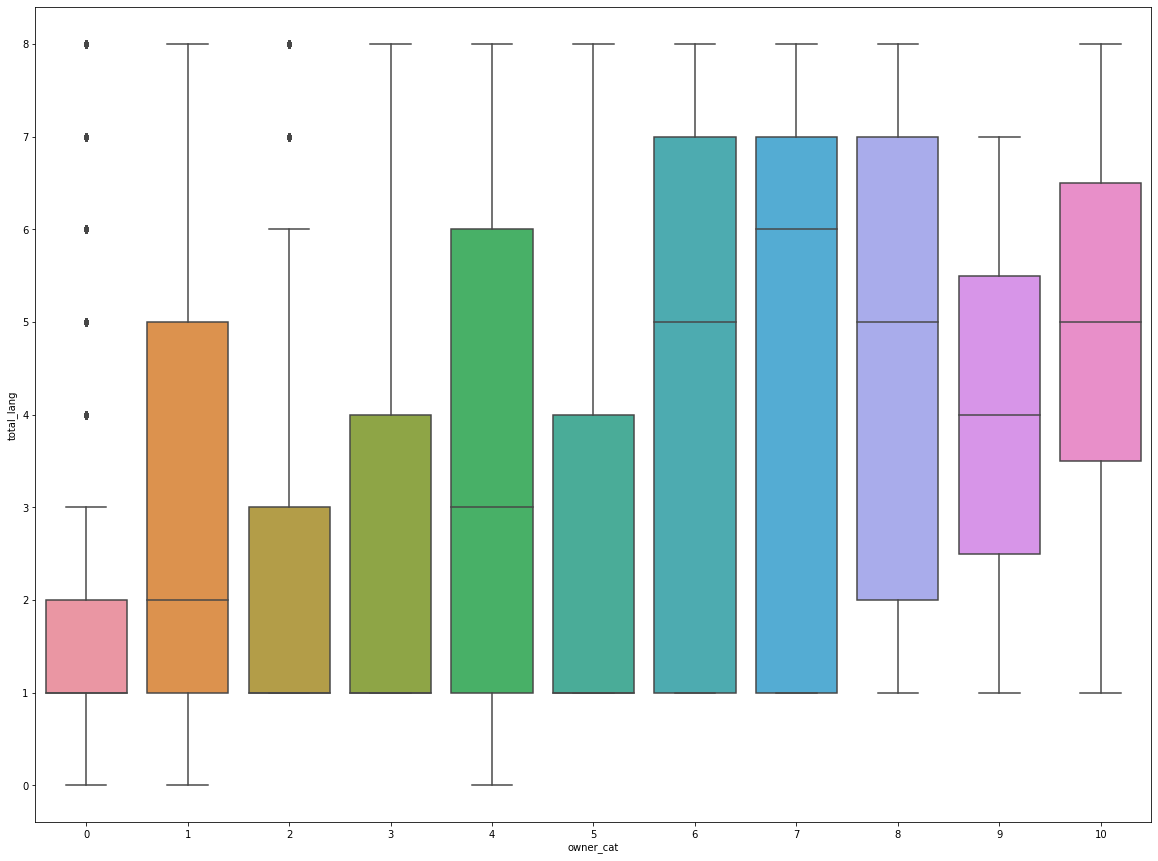

In [571]:
test =  RemoveOutLiars(file[['total_lang' , 'owner_cat']] , 'total_lang' )

f = plt.figure(figsize=(20,15))
sb.boxplot(y = 'total_lang' , x = 'owner_cat' , data= test)